In [180]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6  

In [181]:
df1_6 = pd.read_csv('../data_/data_ana/radar_count_2022_01_06.csv')
df1_7_12 = pd.read_csv('../data_/data_ana/radar_count_2022_07_12.csv')

# join two dataframes
df = pd.concat([df1_6, df1_7_12], ignore_index=True)

# sort by time_index
df = df.sort_values(by=['time_index'])
df.isnull().sum()   # no missing values

time_index            0
entity_id             0
faixa                 0
vehiclelight          0
speedlight            0
vehicleheavy          0
speedheavy            0
vehicleothers         0
speedothers           0
accelerationlight     0
accelerationheavy     0
accelerationothers    0
dtype: int64

In [182]:
# drop 
df.drop(['speedlight', 'speedheavy', 'speedothers', 'accelerationlight', 'accelerationheavy', 'accelerationothers', 'faixa'], axis=1, inplace=True)

# only for radar 35
df = df[df['entity_id'] == 'urn:ngsi-ld:Count:aveiro_radar:p35']

# create another column thats the sum of all vehicles
df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']

df


,time_index,entity_id,vehiclelight,vehicleheavy,vehicleothers,total
689858,2022-01-11 17:22:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,20,0,0,20
689859,2022-01-11 17:22:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,13,0,3,16
689862,2022-01-11 17:23:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,9,0,1,10
689863,2022-01-11 17:23:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,6,0,4,10
689866,2022-01-11 17:24:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,12,2,2,16
...,...,...,...,...,...,...
1510283,2022-12-31 23:55:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
1510282,2022-12-31 23:56:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0,2
1510281,2022-12-31 23:57:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,0,0,1
1510280,2022-12-31 23:57:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,0,0,2,2


In [185]:
# agregate by month
df['time_index'] = pd.to_datetime(df['time_index'])
df = df.set_index('time_index')
df_month = df.resample('M').sum()
df_month = df_month.reset_index()
df_month['time_index'] = df_month['time_index'].dt.strftime('%Y-%m')
df_month





KeyError: 'time_index'

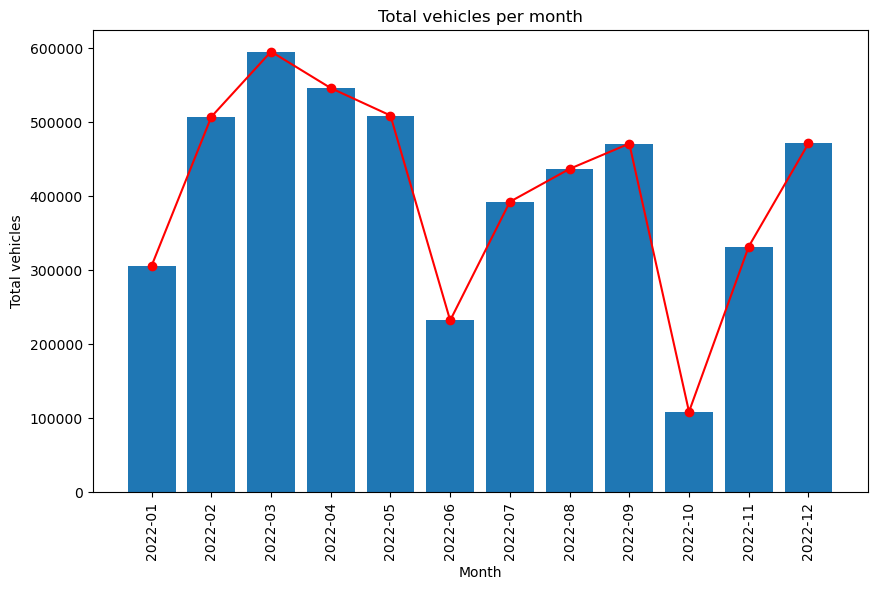

In [187]:

# bar plot
plt.bar(df_month['time_index'], df_month['total'])
# plot a line that touches the top of each bar
plt.plot(df_month['time_index'], df_month['total'], color='red', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total vehicles')
plt.title('Total vehicles per month')
plt.show()

In [150]:
# lets agregate by day and hour 
df['time_index'] = pd.to_datetime(df['time_index'])
df['day'] = df['time_index'].dt.date
df['hour'] = df['time_index'].dt.hour


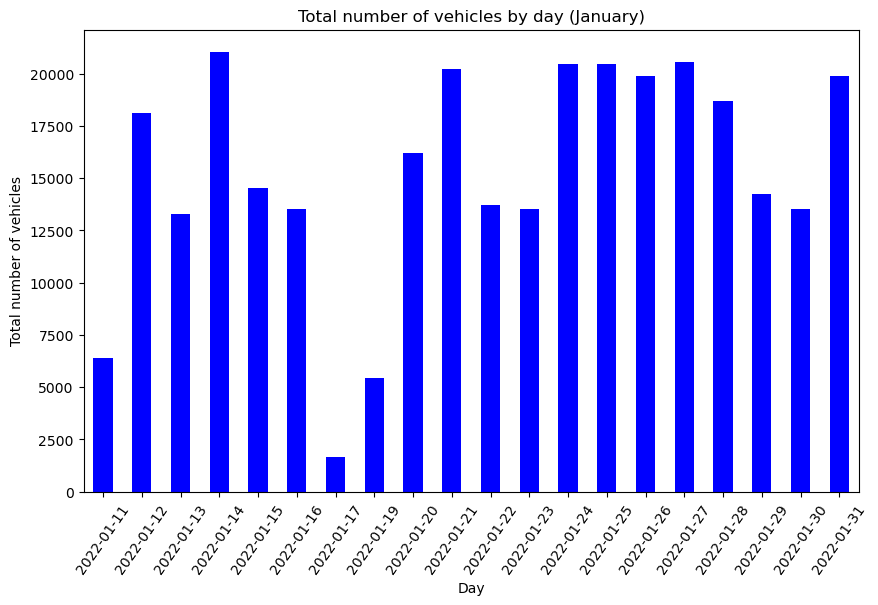

,day,hour,vehiclelight,vehicleheavy,vehicleothers,total
122,2022-01-17,0,113,1,7,121
123,2022-01-17,1,59,2,1,62
124,2022-01-17,2,23,0,3,26
125,2022-01-17,3,20,0,0,20
126,2022-01-17,4,23,1,1,25
127,2022-01-17,5,39,1,1,41
128,2022-01-17,6,101,4,12,117
129,2022-01-17,7,636,33,51,720
130,2022-01-17,8,484,20,34,538


In [151]:

# agregate by day and hour
df = df.groupby(['day', 'hour']).sum().reset_index()
df2 = df.copy()
# lets plot the total number of vehicles by day
df[:421].groupby('day')['total'].sum().plot(kind='bar', color='blue')
plt.title('Total number of vehicles by day (January)')
plt.xlabel('Day')
plt.xticks(rotation=55)
plt.ylabel('Total number of vehicles')
plt.show()

# SHOW THE 2022-01-17 values
x = df[df['day'] == pd.to_datetime('2022-01-17')]
x


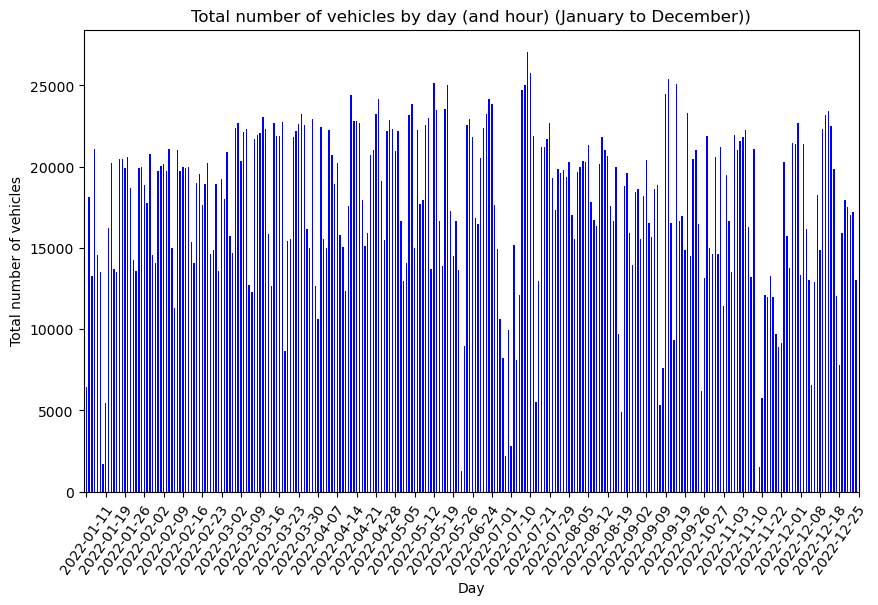

In [152]:

# agregate by day and hour
df = df.groupby(['day', 'hour']).sum().reset_index()

# lets plot the total number of vehicles by day
df.groupby('day')['total'].sum().plot(kind='bar', color='blue')
plt.title('Total number of vehicles by day (and hour) (January to December))')
plt.xlabel('Day')
# erase all xticks
plt.xticks(np.arange(0, 365, 7), rotation=55)
# stretch the x axis
plt.xlim(-1, 280)

plt.ylabel('Total number of vehicles')
plt.show()


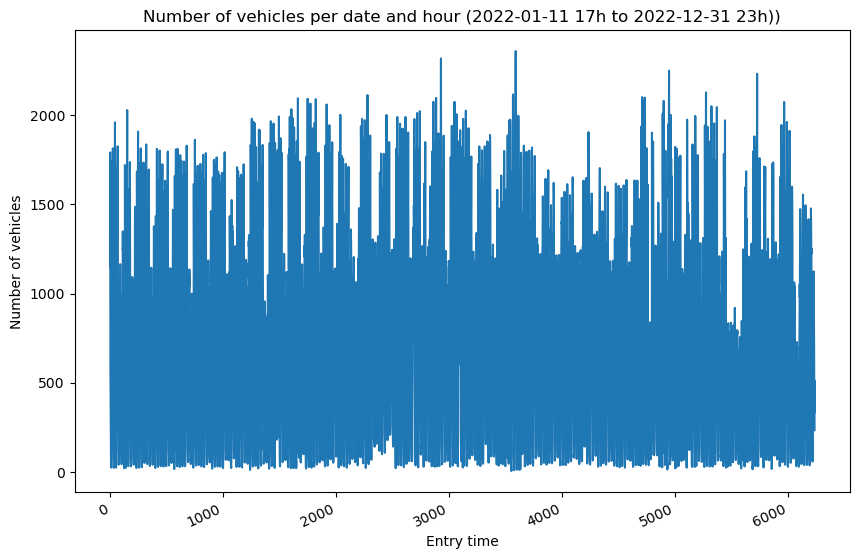

In [153]:
# # plot
plt.xlabel('Entry time')
plt.xticks( rotation=25, ha="right")
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per date and hour (2022-01-11 17h to 2022-12-31 23h))')
plt.plot(df.index, df['total'])

In [154]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# ARIMA model
model = ARIMA(df['total'], order=(1, 0, 3)) # p, d, q 
                                            # p: number of lag observations included in the model
                                            # d: number of times that the raw observations are differenced
                                            # q: size of the moving average window, also called the order of moving average
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                 6232
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -43234.602
Date:                Sat, 20 May 2023   AIC                          86481.204
Time:                        01:04:53   BIC                          86521.628
Sample:                             0   HQIC                         86495.215
                               - 6232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        786.3932     27.416     28.684      0.000     732.659     840.128
ar.L1          0.7641      0.016     47.569      0.000       0.733       0.796
ma.L1          0.4800      0.013     35.582      0.0

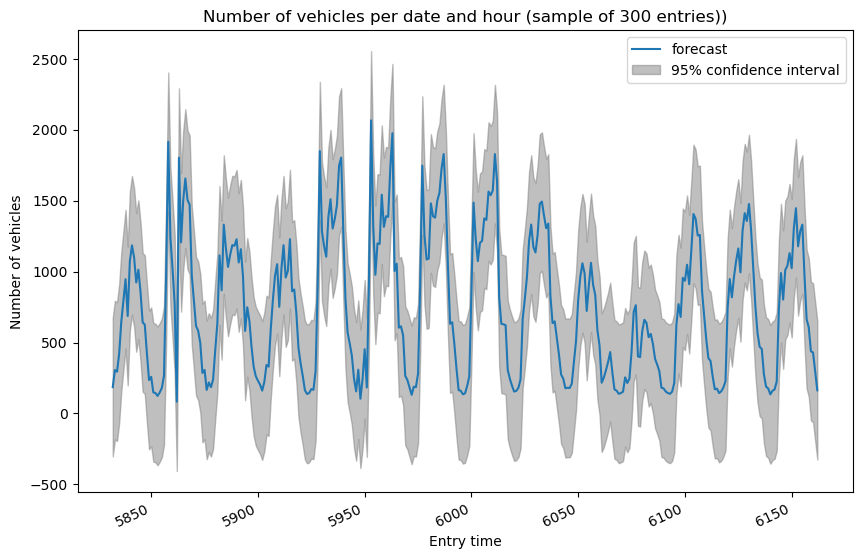

In [155]:
# plot
# plot only the last 500 entries
plot_predict(model_fit, start=len(df)-400, end=len(df)-70)
plt.xlabel('Entry time')
plt.xticks( rotation=25, ha="right")
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per date and hour (sample of 300 entries))')
plt.show()



In [156]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
data = df['total'].values

data = data.reshape(-1, 1)  # type: ignore
data



array([[1152],
       [1792],
       [1340],
       ...,
       [ 329],
       [ 512],
       [ 233]], dtype=int64)

<AxesSubplot:>

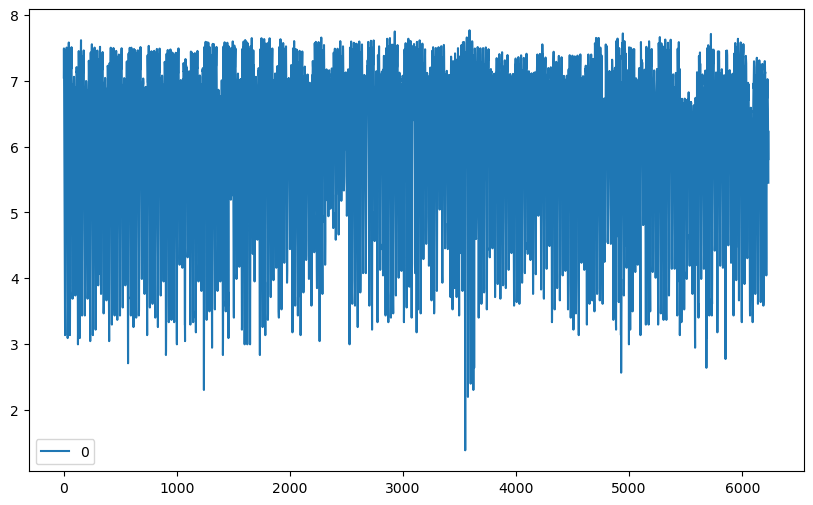

In [158]:
data = np.log(data) # type: ignore

df = pd.DataFrame(data)
df.plot()

In [159]:
# divide into train and test
# set last 100 entries as test
df_train = df[:-100]
df_test = df[-100:]

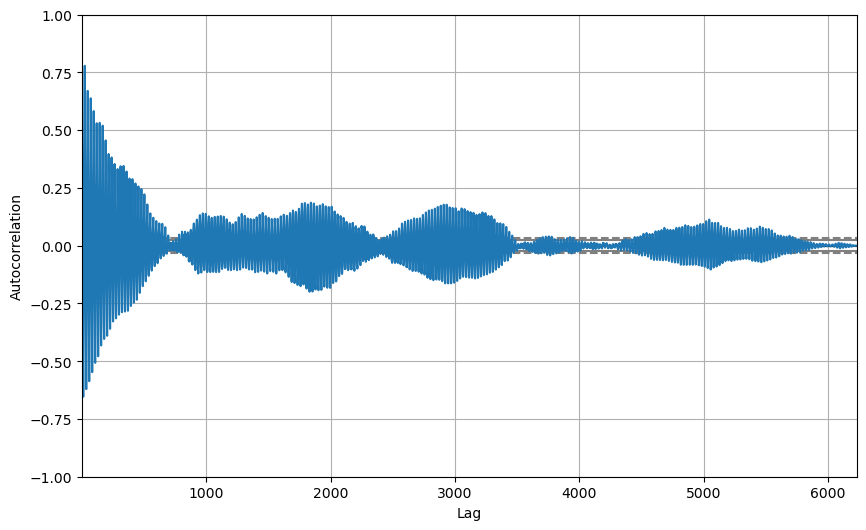

In [160]:
from pandas.plotting import autocorrelation_plot

# plotting autocorrelation from all data
autocorrelation_plot(df2['total'])
plt.show()

# ler

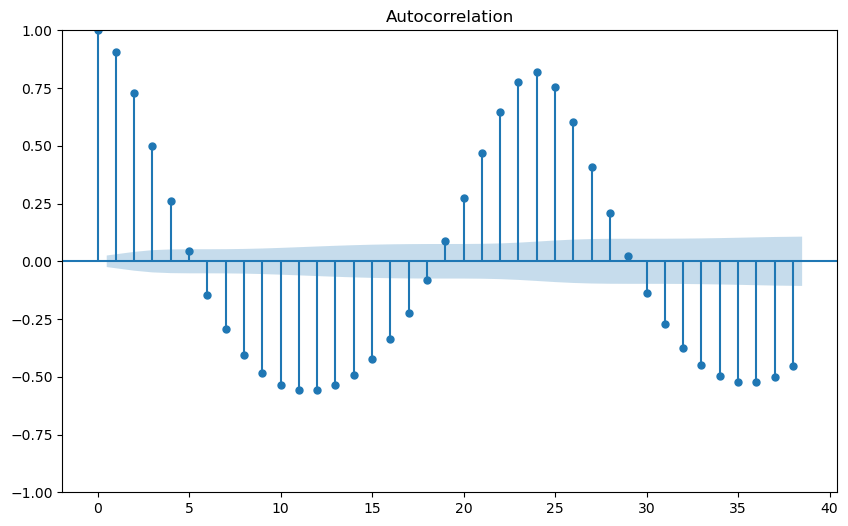

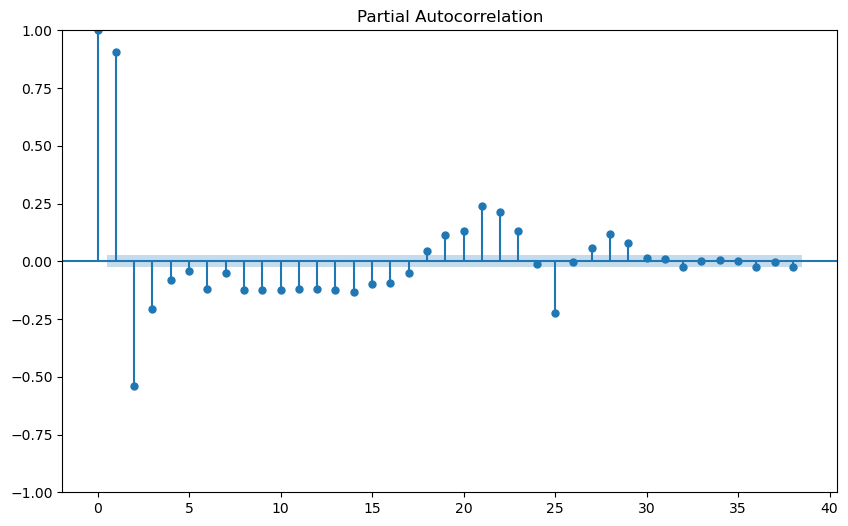

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

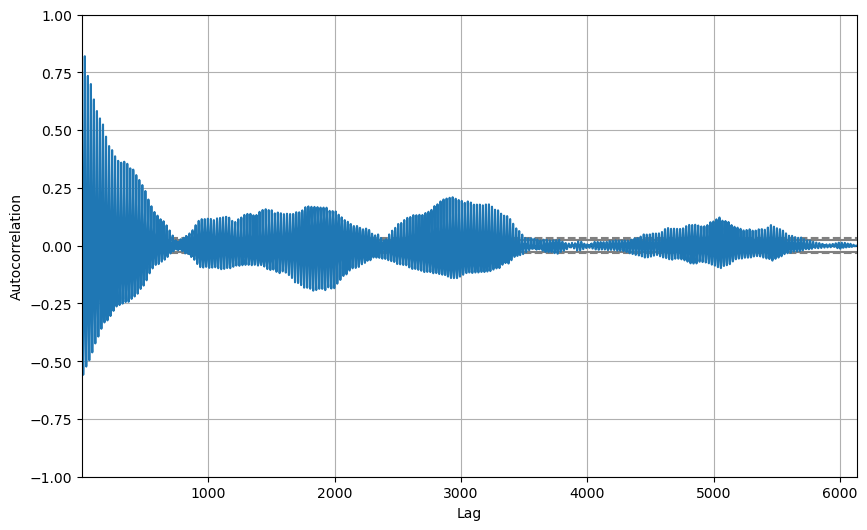

In [188]:
from pandas.plotting import autocorrelation_plot

# plotting autocorrelation
autocorrelation_plot(df_train)
plt.show()

In [162]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 9.553337656438488e-18


<AxesSubplot:>

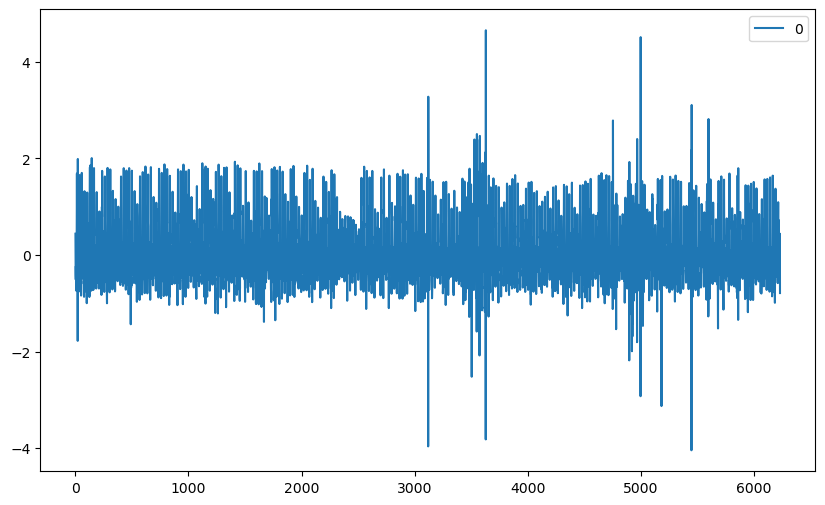

In [163]:
df_train_diff = df.diff().dropna()
df_train_diff.plot()

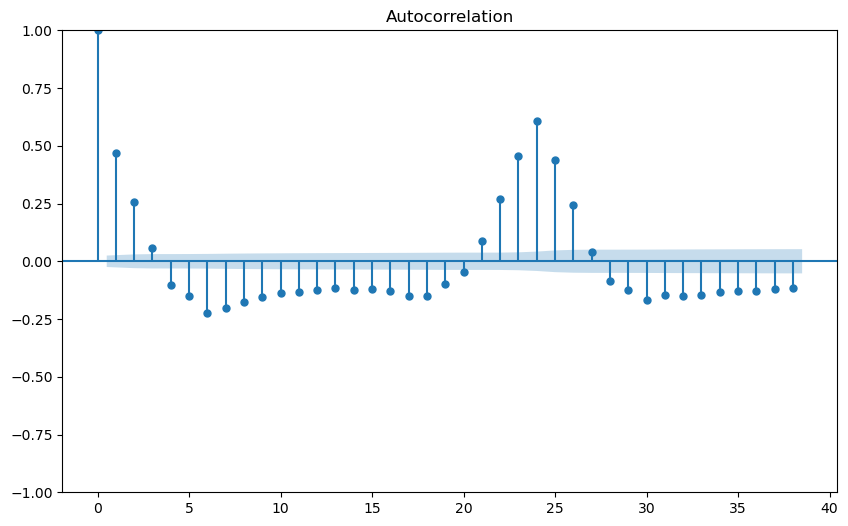

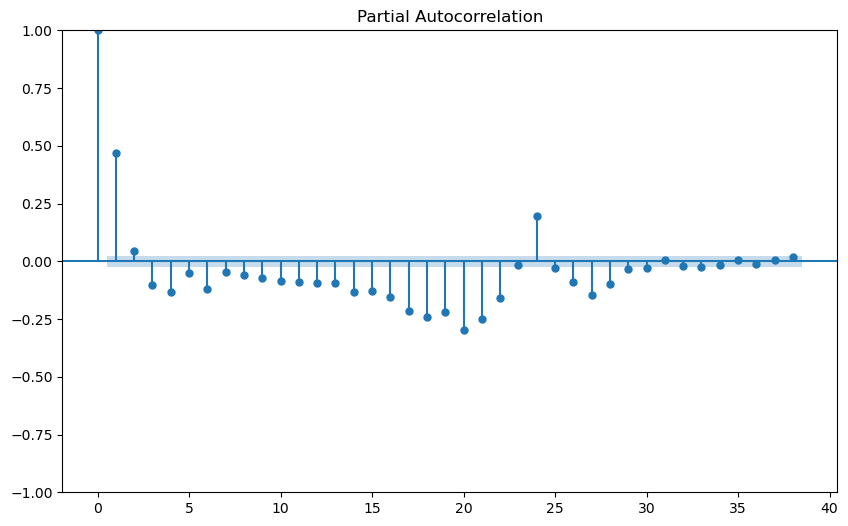

In [164]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)


In [165]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 6132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4050.229
Date:                Sat, 20 May 2023   AIC                           8106.458
Time:                        01:04:56   BIC                           8126.621
Sample:                             0   HQIC                          8113.452
                               - 6132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5190      0.016     32.194      0.000       0.487       0.551
ma.L1         -0.0643      0.016     -3.973      0.000      -0.096      -0.033
sigma2         0.2194      0.002    133.590      0.0

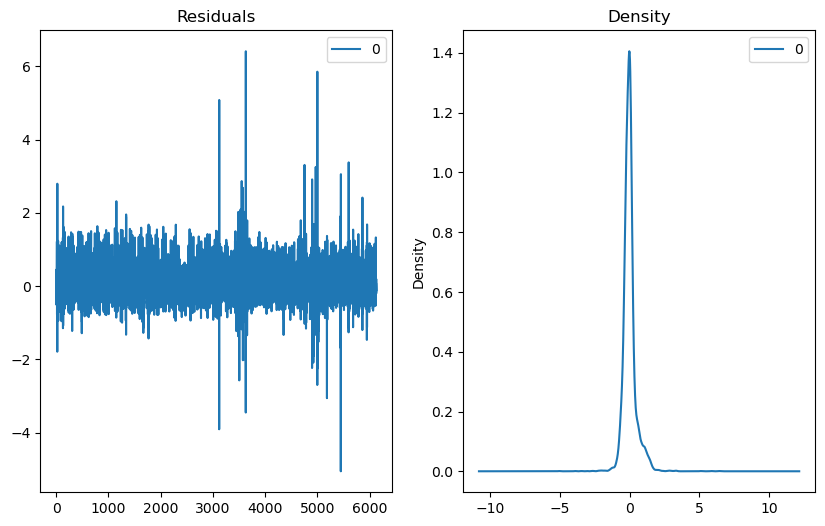

In [166]:

import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals = pd.DataFrame(residuals)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

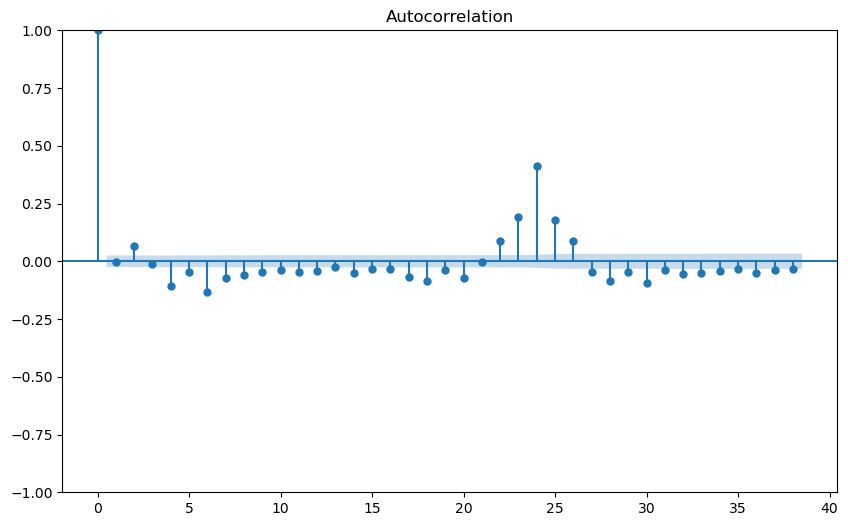

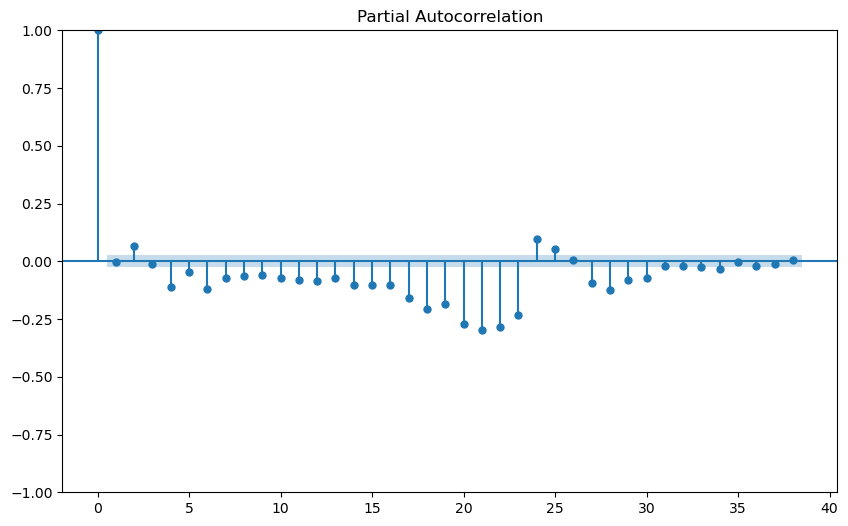

In [167]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<AxesSubplot:>

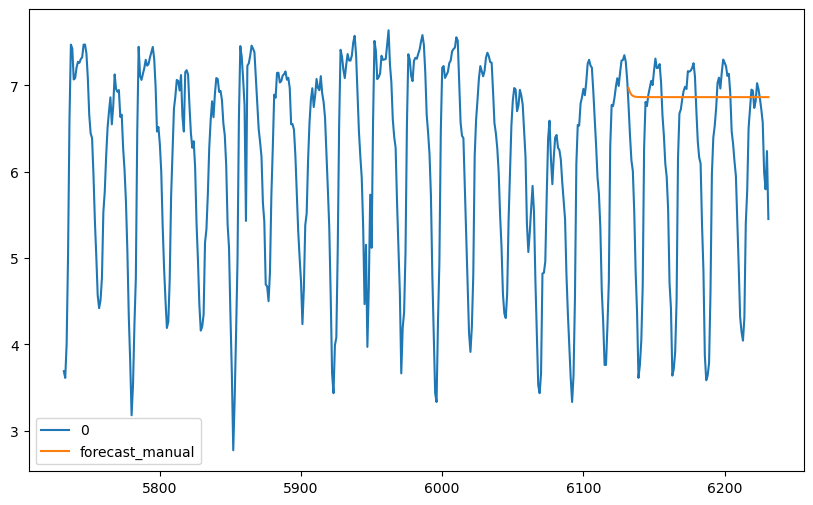

In [168]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()

forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df[-500:].plot()

In [169]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=True, m=1, trace=True)
auto_arima


 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=19959.876, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=13777.114, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=10708.644, Time=1.09 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=8721.660, Time=1.44 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=8023.071, Time=1.64 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=7473.466, Time=2.49 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=9345.739, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=8034.258, Time=1.04 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=7541.976, Time=1.60 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=7291.402, Time=2.96 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=7249.599, Time=2.55 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=7233.827, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=6867.577, Time=2.23 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=6599.218, Time=3.85 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=6533.398, Time=7.95 sec
 ARIMA(

ARIMA(order=(2, 0, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 6132
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3259.696
Date:                Sat, 20 May 2023   AIC                           6533.392
Time:                        01:05:53   BIC                           6580.441
Sample:                             0   HQIC                          6549.713
                               - 6132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1656      0.014    455.202      0.000       6.139       6.192
ar.L1          1.8091      0.007    257.484      0.000       1.795       1.823
ar.L2         -0.8861      0.007   -136.143      0.0

<AxesSubplot:>

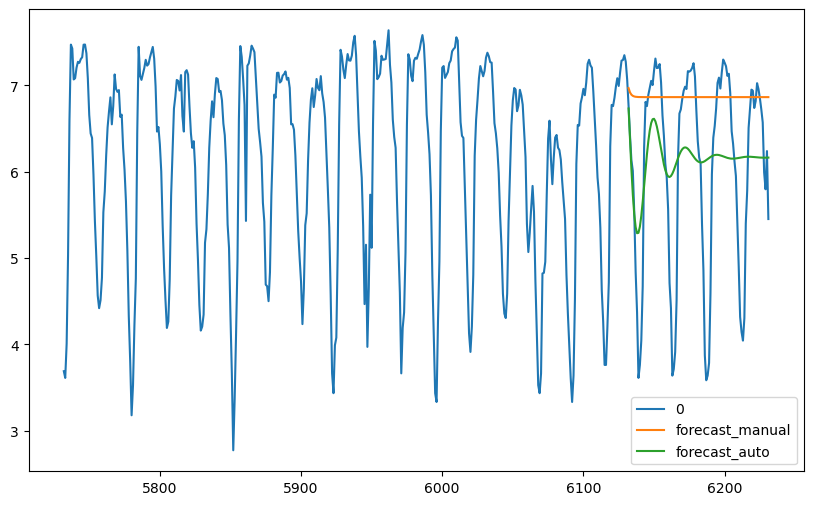

In [170]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df[-500:].plot()


In [171]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.9539576600483269
mape - manual: 0.20622375236935928
rmse - manual: 1.3994595766877478


In [172]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.823757154004747
mape - auto: 0.16162088455143533
rmse - auto: 1.033919329586213


<AxesSubplot:>

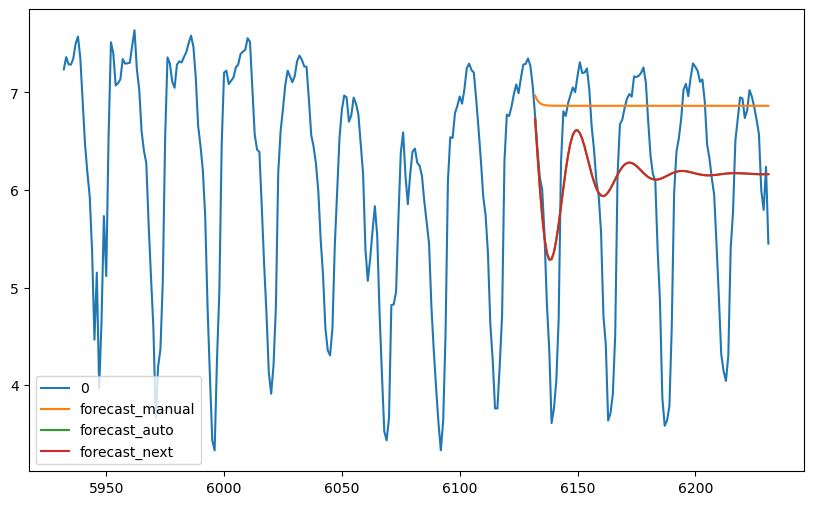

In [173]:
# predict for the next 100 entries
forecast_next = model_fit.forecast(100)
df['forecast_next'] = [None]*(len(df_train)) + list(forecast_next)

# show only the last 500 entries
df[-300:].plot()



In [174]:
# Build Model
model = ARIMA(df_train, order=(10, 0, 0))   # ARIMA(10, 0, 0) -> p = 10, d = 0, q = 0 
    # p means the number of lags to be used as predictors
    # d means the number of times that the raw observations are differenced
    # q is the size of the moving average window, also called the order of moving average
fitted = model.fit()


<Figure size 1200x500 with 0 Axes>

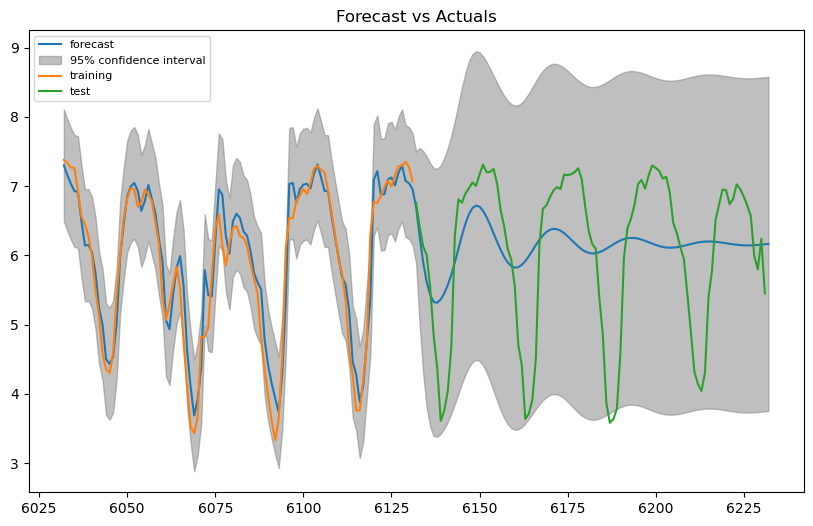

In [175]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)
plot_predict(fitted, start=len(df_train)-100, end=len(df_train)+len(df_test))
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='test')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()  

<Figure size 1200x500 with 0 Axes>

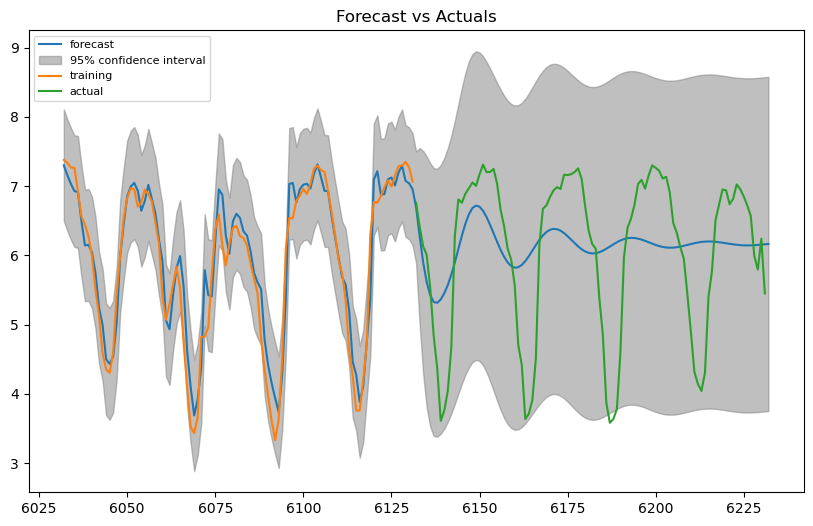

In [176]:

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plot_predict(fitted, start=len(df_train)-100, end=len(df_train)+len(df_test))
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()  

<AxesSubplot:>

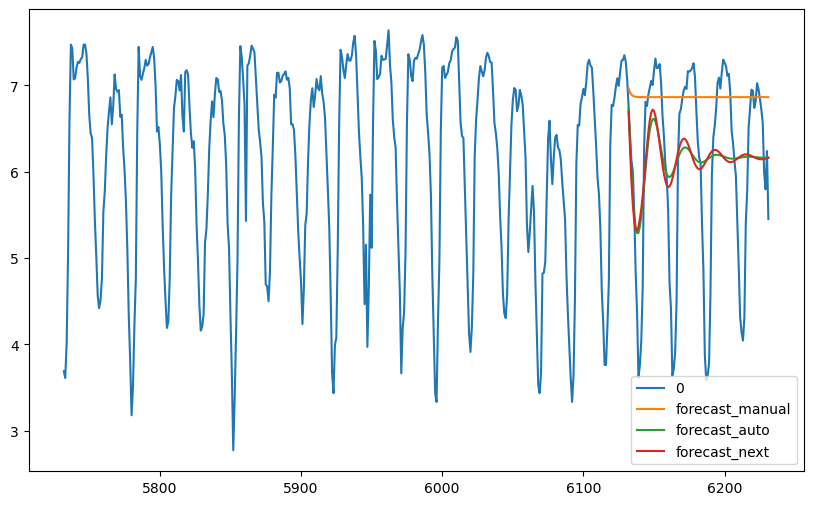

In [177]:
# now lets predict for the next 100 entries
forecast_next = fitted.forecast(100)
df['forecast_next'] = [None]*len(df_train) + list(forecast_next)

# show only the last 500 entries
df[-500:].plot()


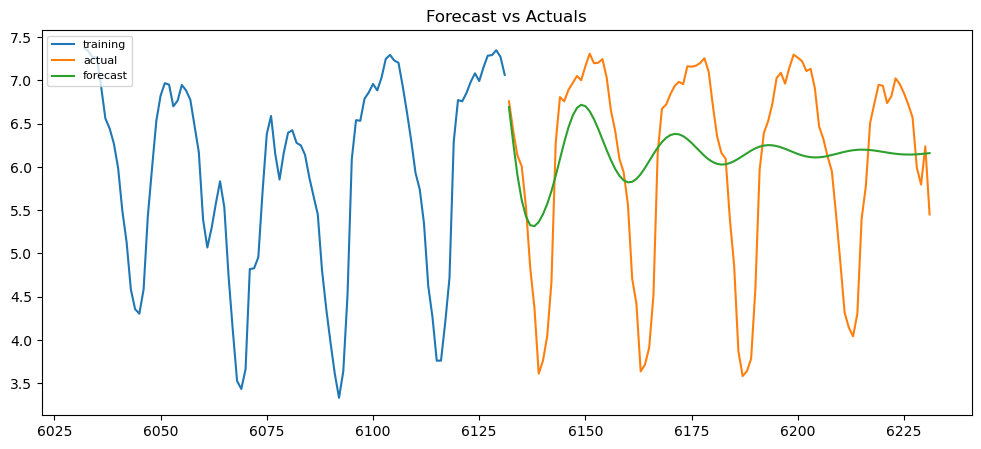

In [178]:
# create a plot that shows the actual values and the predicted values and then predicts the next 100 entries
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df_train[-100:], label='training')
plt.plot(df_test, label='actual')
plt.plot(df['forecast_next'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


